In [ ]:
#Data Prepocessing
import pandas as pd
spotify_data=pd.read_csv("/content/drive/MyDrive/spotify52kData.csv")
# Assuming df is your DataFrame and 'genre' is the column where you want to make the change
# Replace 'alt' with 'alternative rock' in the 'genre' column
spotify_data['track_genre'] = spotify_data['track_genre'].replace('alternative', 'alt-rock')



# Check for duplicate rows
spotify_data.drop('songNumber', axis=1, inplace=True)
duplicates = spotify_data.duplicated().sum()
nulls=spotify_data.duplicated().isna().sum()


print(f"Number of duplicate rows in the dataset: {duplicates}")
print(f"Number of nulls in the dataset: {nulls}")

spotify_data_dropped=spotify_data.drop_duplicates()
print(spotify_data_dropped.shape)
unique_genres = spotify_data_dropped['track_genre'].unique()
print(unique_genres)
spotify_data_dropped

Number of duplicate rows in the dataset: 863
Number of nulls in the dataset: 0
(51137, 19)
['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'anime' 'black-metal'
 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british' 'cantopop'
 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy' 'country'
 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno' 'disco'
 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro' 'electronic'
 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german' 'gospel' 'goth'
 'grindcore' 'groove' 'grunge' 'guitar' 'happy' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop']


,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,Don Omar;Trebol Clan,Perreo Tenebroso Vol. 3,Tu Cuerpo Me Arrebata,0,203653,False,0.819,0.6450,10,-6.707,0,0.0481,0.23200,0.000863,0.1780,0.724,94.998,4,hip-hop
51996,Don Omar,Feliz Cumpleaños con Perreo,Dale Don Dale,1,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51997,Don Omar,Última Misión Reggaeton,Dale Don Dale,0,212413,False,0.831,0.8180,2,-7.827,1,0.0824,0.02450,0.000319,0.0892,0.819,95.022,4,hip-hop
51998,Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee,Energy Hip Hop,Switches & Dracs,0,168620,True,0.727,0.6470,11,-7.383,0,0.2800,0.03290,0.000000,0.2460,0.529,159.959,4,hip-hop


<ipython-input-5-83b3287ed52e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_dropped['explicit'] = spotify_data['explicit'].astype(int)


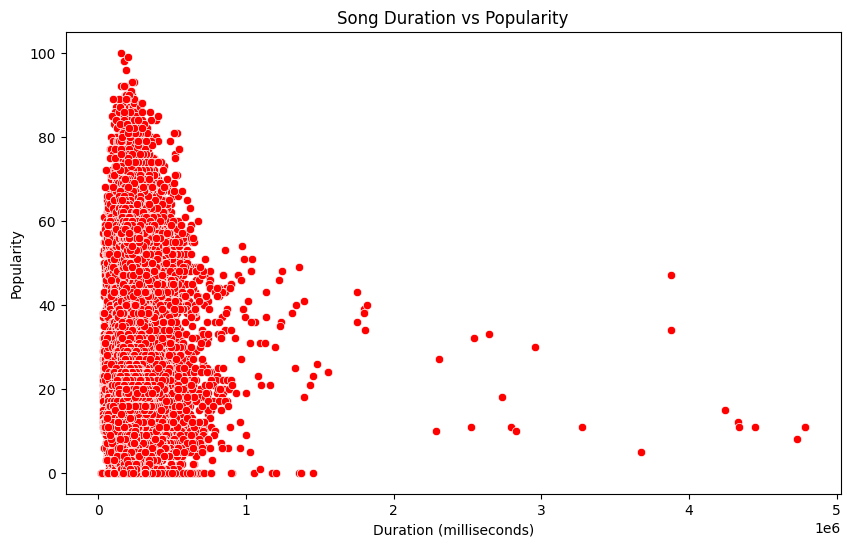

Correlation between duration and popularity: -0.05465119593637638
{'Correlation Coefficient': -0.05465119593637635, 'P-Value for Correlation': 1.069160283049238e-35}


In [ ]:
#Q1.Is there a relationship between song length and popularity of a song? If so, is it positive or negative?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

# Preprocessing
# Converting 'explicit' column to numerical format
spotify_data_dropped['explicit'] = spotify_data['explicit'].astype(int)

# Analysis 1: Relationship between song length and popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data, x='duration', y='popularity',color='red')
plt.title('Song Duration vs Popularity')
plt.xlabel('Duration (milliseconds)')
plt.ylabel('Popularity')
plt.show()

correlation_duration_popularity = spotify_data['duration'].corr(spotify_data['popularity'])
print(f"Correlation between duration and popularity: {correlation_duration_popularity}")

#Method B to confirm-Pearsons coefficient caculation and also the p value for the same

#We considered the following conditions

#Null Hypothesis
#Alternative Hypothesis

from scipy.stats import pearsonr
correlation, p_value_correlation = pearsonr(spotify_data['duration'], spotify_data['popularity'])
correlation_results = {
    "Correlation Coefficient": correlation,
    "P-Value for Correlation": p_value_correlation
}
print(correlation_results)



#**Conclusion**
The negative correlation coefficient suggests a slight inverse relationship between song duration and popularity. However, given the small magnitude of the coefficient, this relationship is not strong.

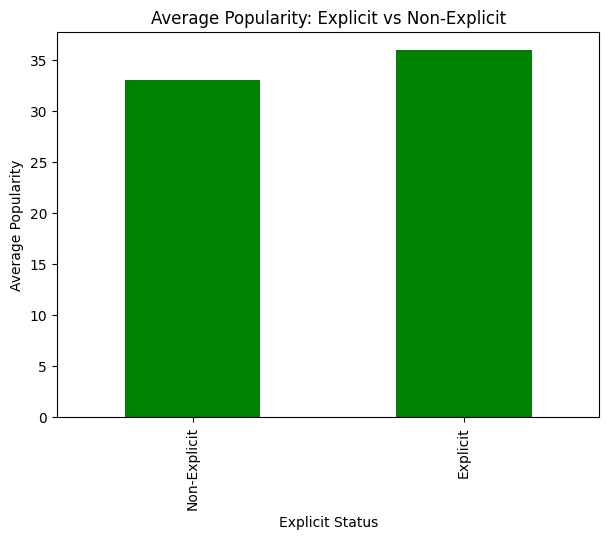

Average popularity by explicit status:
 explicit
0    32.991097
1    35.985180
Name: popularity, dtype: float64


In [ ]:
##Q2
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Assuming you've already loaded your dataset into 'spotify_data_dropped'
# Example: spotify_data_dropped = pd.read_csv('your_spotify_data.csv')

# Calculate average popularity for explicit and non-explicit songs
avg_popularity_explicit = spotify_data_dropped.groupby('explicit')['popularity'].mean()

# Plotting the average popularity
plt.figure(figsize=(7, 5))
avg_popularity_explicit.plot(kind='bar', color='green')
plt.title('Average Popularity: Explicit vs Non-Explicit')
plt.xlabel('Explicit Status')
plt.ylabel('Average Popularity')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.show()

# Print the average popularity by explicit status
print("Average popularity by explicit status:\n", avg_popularity_explicit)



In [ ]:
import scipy.stats as stats

# Assuming you've already loaded your dataset into 'spotify_data_dropped'

# Filter popularity based on the explicit value
popularity_explicit = spotify_data_dropped[spotify_data_dropped['explicit'] == 1]['popularity']
popularity_non_explicit = spotify_data_dropped[spotify_data_dropped['explicit'] == 0]['popularity']

# Perform the t-test
t_statistic_explicit, p_value_explicit = stats.mannwhitneyu(popularity_explicit, popularity_non_explicit)




print(explicit_vs_non_explicit_results)

{'T-Statistic (Explicit)': 135366990.5, 'P-Value (Explicit)': 6.486637292678943e-19}


**Conclusion**

The average popularity scores show that explicit songs have a slightly higher average popularity than non-explicit songs in your dataset.
The t-test results confirm that this difference is statistically significant. The very low p-value indicates that it's highly unlikely that such a difference would occur by chance.


Average popularity by key:
 Minor Key    33.885030
Major Key    32.969012
Name: popularity, dtype: float64


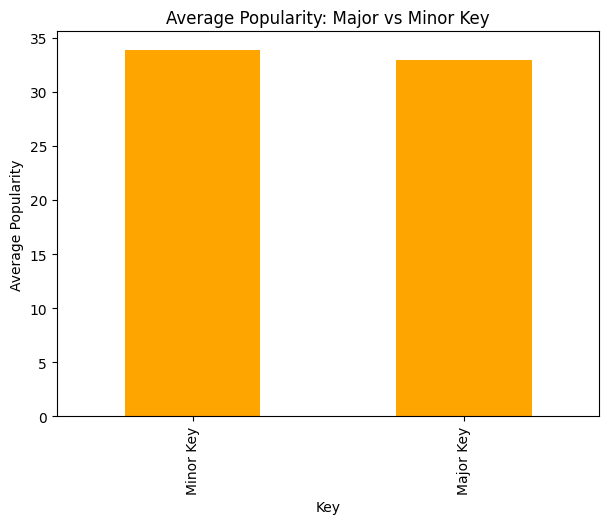

In [ ]:
#3) Are songs in major key more popular than songs in minor key?
average_popularity_by_key = spotify_data_dropped.groupby('mode')['popularity'].mean()
average_popularity_by_key.index = ['Minor Key', 'Major Key']
print("Average popularity by key:\n", average_popularity_by_key)
# Bar chart for Major vs Minor Key Songs
plt.figure(figsize=(7, 5))
average_popularity_by_key.plot(kind='bar',color='orange')
plt.title('Average Popularity: Major vs Minor Key')
plt.xlabel('Key')
plt.ylabel('Average Popularity')
plt.xticks([0, 1], ['Minor Key', 'Major Key'])
plt.show()

In [ ]:
##Hypothesis Testing to understtand statistical signifiance
t_statistic_key, p_value_key = ttest_ind(
    spotify_data_dropped[spotify_data_dropped['mode'] == 1]['popularity'],
    spotify_data_dropped[spotify_data_dropped['mode'] == 0]['popularity']
)
t_statistic_explicit, p_value_explicit = stats.mannwhitneyu(popularity_explicit, popularity_non_explicit)


print(explicit_vs_non_explicit_results)


{'T-Statistic (Explicit)': 135366990.5, 'P-Value (Explicit)': 6.486637292678943e-19}


**Conclusion**

The statistical test confirms that the difference in popularity between songs in major and minor keys is not just a random occurrence; it's a statistically significant difference. Songs in minor keys tend to be slightly more popular than those in major keys, as indicated by both the average popularity scores and the t-test results.

###Extra Credit###


<ipython-input-18-01ed241a9f2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_length'] = df['track_name'].apply(len)


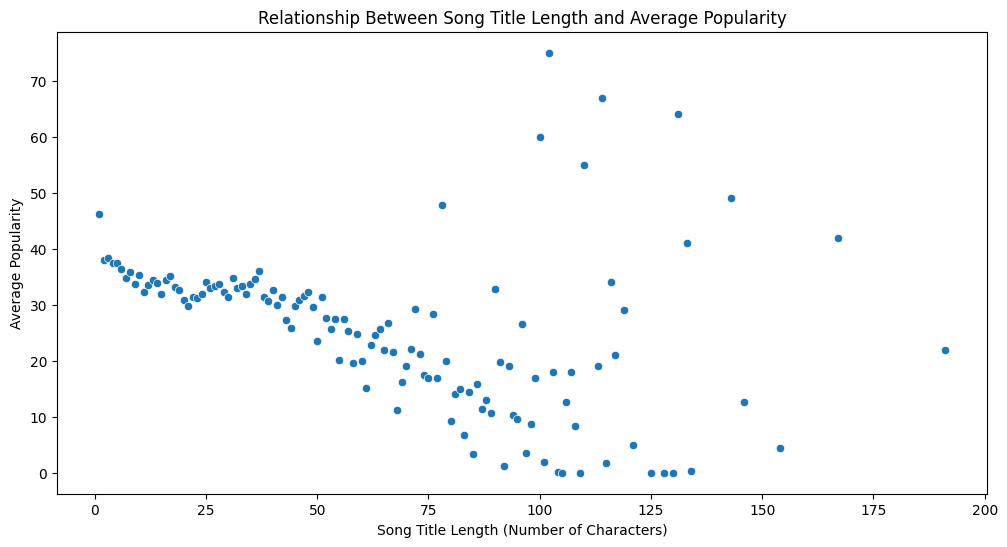

,title_length,popularity
0,1,46.285714
1,2,37.947598
2,3,38.338462
3,4,37.537302
4,5,37.512999


In [ ]:
# Let's explore something interesting with song or album titles. We can analyze the length of song titles
# and see if there's any correlation with the popularity of the songs.

# Calculating the length of each song title
df=spotify_data_dropped
df['title_length'] = df['track_name'].apply(len)

# Grouping by title length and calculating the average popularity for each length
title_length_popularity = df.groupby('title_length')['popularity'].mean().reset_index()

# Plotting the relationship between title length and average popularity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='title_length', y='popularity', data=title_length_popularity)
plt.title('Relationship Between Song Title Length and Average Popularity')
plt.xlabel('Song Title Length (Number of Characters)')
plt.ylabel('Average Popularity')
plt.show()

title_length_popularity.head()  # Displaying the first few rows for quick reference
